In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_img_path="car1.jpeg"

In [31]:
def read_img(path, grayscale=True):
    img=cv2.imread(path)
    if grayscale:
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
        return img
    car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
    return car1_cv2_BGR_RGB
  

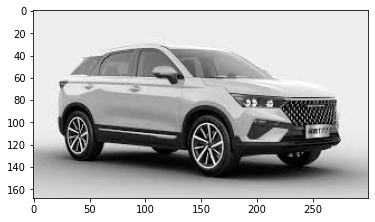

In [25]:
car=read_img(car_img_path)

In [32]:
color_car=read_img(car_img_path, grayscale=False)

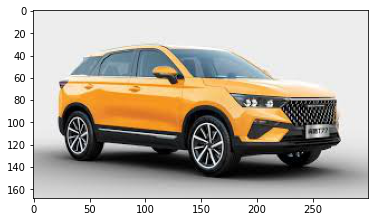

In [20]:

car1_cv2=cv2.imread("car1.jpeg")
car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)


In [59]:
car.shape

(1, 168, 300, 1)

In [60]:
color_car.shape

(1, 168, 300, 3)

In [76]:
#(1,r,c,1)
#row, col=car.shape
#car=car.reshape(1,row,col,1)# gray scale image
# for color image
#car=color_car.reshape(1,row,col,3)
car.shape

(1, 168, 300, 1)

In [77]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [78]:
3*3 +1

10

In [79]:
out=conv_model.predict(car)

In [80]:
out.shape

(1, 166, 298, 1)

In [81]:
(168-3+0)//1 +1

166

In [82]:
(300-3)//1 +1

298

In [83]:
row,col=out.shape[1:-1]
reshape_out=out.reshape(row,col)

In [84]:
reshape_out.shape

(166, 298)

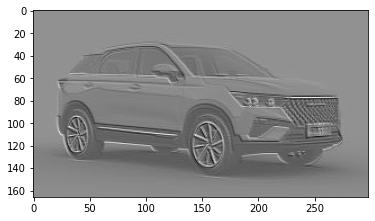

In [85]:
plt.imshow(reshape_out, cmap="gray")

# For Color image

In [86]:
row, col,depth=color_car.shape
color_car=color_car.reshape(1,row,col,depth)
#color_car.shape

ValueError: too many values to unpack (expected 3)

In [87]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


# Display output for 5 filters

In [88]:
def reshape_in(img, grayscale=True):
    if grayscale:
        row,col=img.shape
        img=img.reshape(1,row,col,1)#for gray scale
        return img
    row,col,depth=img.shape# for color image
    color_img=img.reshape(1,row,col, depth)
    return color_img
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
    CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]
    conv_model=tf.keras.Sequential(CONV_LAYER)
    conv_model.summary
    return conv_model
def apply_conv_model_and_visualize(img, conv_model):
    try:
        out=conv_model.predict(img)
        print(out.shape)
        row,col,depth=out.shape[1:]
        reshape_out=out.reshape(row,col,depth)
        
        for d in range(depth):
            plt.imshow(reshape_out[:,:,d], cmap="gray")
            plt.show()
    except Exception as e:
        raise e
      
    

(1, 166, 298, 15)


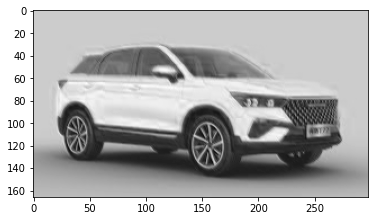

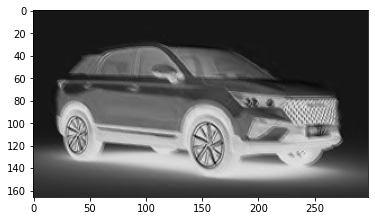

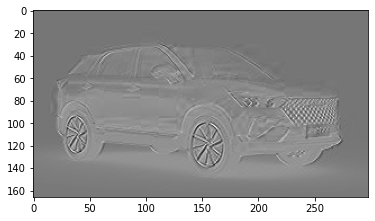

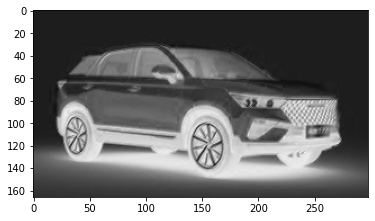

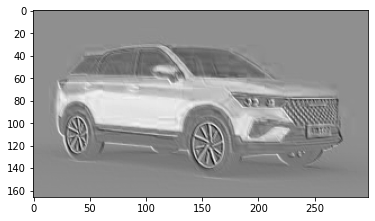

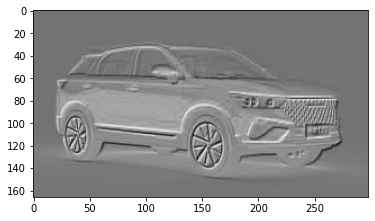

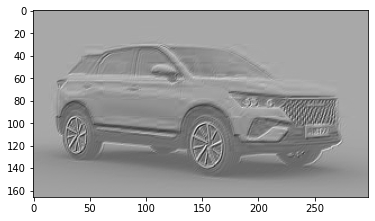

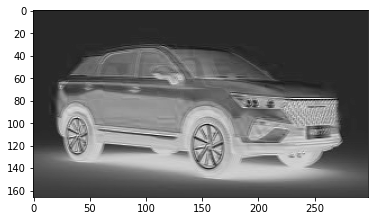

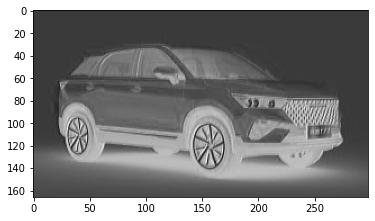

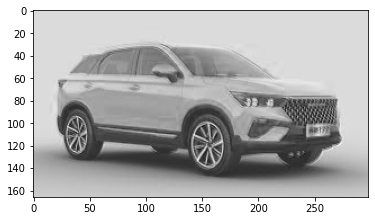

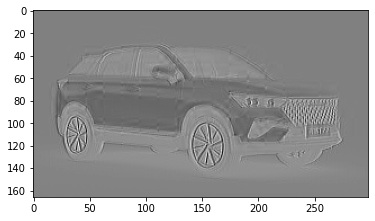

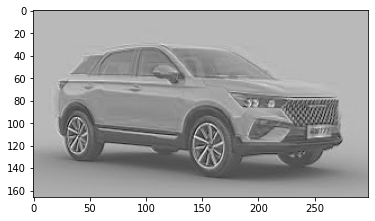

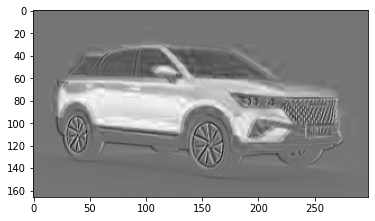

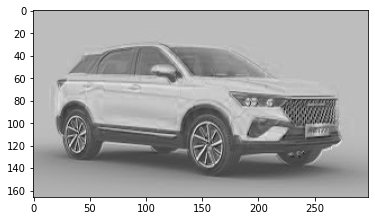

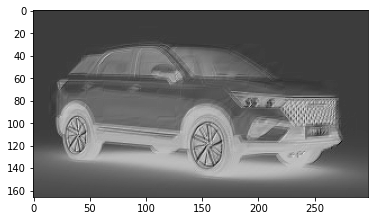

In [98]:
img=read_img(car_img_path, grayscale=False)
input_img=reshape_in(img, grayscale=False)
model = get_conv_model(filters=15, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)